# ====Method2 : Transfer Learning ====

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os, shutil

TRAINDIR = 'gdrive/MyDrive/ee_628/proj/train/'
cat_folder = 'cat'
dog_folder = 'dog'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 10,
                             shear_range=0.2,
                             rescale = 1./255,
                             validation_split=0.25)
IMG_H = 150
IMG_W = 150

In [ ]:
train_generator = datagen.flow_from_directory(TRAINDIR,
                                              target_size=(IMG_H, IMG_W),
                                              batch_size=100,
                                              class_mode='binary',
                                              subset='training')

Found 18750 images belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_directory(TRAINDIR,
                                            target_size=(IMG_H, IMG_W),
                                            batch_size=100,
                                            class_mode='binary',
                                            subset='validation')

Found 6250 images belonging to 2 classes.


In [ ]:
test_generator = datagen.flow_from_directory('gdrive/MyDrive/ee_628/proj/', classes=['test1'],
                                             target_size=(IMG_H, IMG_W))

Found 12500 images belonging to 1 classes.


# Transfer Learning:


#  VGG 16

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications import VGG16, VGG19

In [ ]:
vgg16_base = VGG16(include_top=False, weights='imagenet', input_shape=(IMG_W, IMG_H, 3))


58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

As we see above, when using transfer learning, we are only concerned with the beginning or top convolutional layers from the network once it was trained on ImageNet (in this case) dataset. We will still have to add the fully connected layers to the end of the network for it to perform classifcation. In the layers that we add on now, we can see it will have to take an input of 4X4X512 or a single product of these three if we are working with a Flattening layer. 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

In [ ]:
model = Sequential()
model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(4096))
model.add(Dense(4096))
model.add(Dense(1000))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 4096)              33558528  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 69,152,529
Trainable params: 69,152,529
Non-trainable params: 0
____________________________________________

In [ ]:
hist = model.fit_generator(train_generator, validation_data=val_generator, epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
188/188 [==============================] - 5948s 31s/step - loss: 12.3478 - accuracy: 0.5012 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 2/20
188/188 [==============================] - 226s 1s/step - loss: 0.7010 - accuracy: 0.4950 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 3/20
188/188 [==============================] - 226s 1s/step - loss: 0.6988 - accuracy: 0.5064 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
188/188 [==============================] - 227s 1s/step - loss: 0.7036 - accuracy: 0.4948 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 5/20
188/188 [==============================] - 227s 1s/step - loss: 0.6963 - accuracy: 0.4969 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 6/20
188/188 [==============================] - 225s 1s/step - loss: 0.6953 - accuracy: 0.4979 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 7/20
188/188 [==============================] - 225s 1s/step - loss: 81.6620 - accuracy: 0.5023 - val_loss: 1.0683 - val_accuracy: 0.

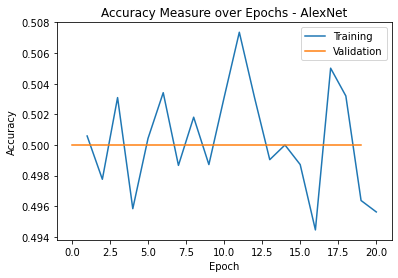

In [ ]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1,21)]

plt.plot(epochs, hist.history['accuracy'], hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy Measure over Epochs - AlexNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

We obserse from the plots above that while training accuracy fluctuates quite a bit, the validation accuracy does not change at all and is completely constant for the entire duration of the 20 epochs. 

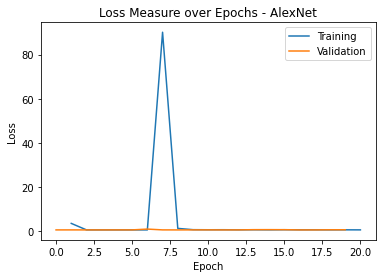

In [ ]:
plt.plot(epochs, hist.history['loss'], hist.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss Measure over Epochs - AlexNet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Clearly, there is need for some investigation in the training of this network as it seems to not be doing much on the validation set. It could be that this is due to the fact that there are too many dense layers at the end of the network. More about this has been mentioned in the Conclusion. 

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.7615352869033813, 0.5]

In [ ]:
model.evaluate_generator(val_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.7615354657173157, 0.5]

| | Accuracy% | Loss |
| :-: | :-: | :-: |
| Training | 50 | 0.7615 |
| Validation | 50 | 0.7615 |